**Install packages**

In [ ]:
# Package for ggplot2 enhancements
install.packages("ggExtra")

# Package for multivariate normal distribution
install.packages('mvtnorm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘bslib’, ‘colourpicker’, ‘miniUI’, ‘shiny’, ‘shinyjs’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Load essential libraries**

In [2]:
library(ggplot2) # library for plotting
library(dplyr) # library for data wrangling
library(ggExtra) # library for enhanced ggplot2 plots
library(mvtnorm) # library for multivariate normal distribution
library(tidyr) # library to reorganize data

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggExtra' was built under R version 3.6.3"Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [3]:
# Load RData file data2.RData
load(url('https://tinyurl.com/527nxn23'))
str(data2)

List of 3
 $ X   : num [1:1000, 1:11] 6.65 -5.63 9.72 -4.64 -12.84 ...
 $ Xval: num [1:100, 1:11] 18.27 -3.19 -5.26 12.95 3.76 ...
 $ yval: num [1:100, 1] 1 0 0 1 0 0 0 0 0 0 ...
 - attr(*, "header")=List of 3
  ..$ description: chr "MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 23:12:48 2011                                                "
  ..$ version    : chr "5"
  ..$ endian     : chr "little"


In [4]:
# Training data
X_train = data2$X # training data as matrix (all samples here are non-anomalous)
df_train = as.data.frame(X_train) # training data frame
head(X_train, n = 5)

6.653114,13.689702,17.552845,-11.933497,-5.756409,15.435921,-12.1367520,8.2241226,-4.8840241,5.3493353,17.351372352
-5.630542,-18.937667,18.644624,-6.155825,-25.988864,15.409553,-16.5955163,9.4546537,-2.8771734,-6.0094204,19.210636116
9.721525,-9.982489,15.571434,-32.224266,-5.595799,24.321383,0.8327735,10.7945546,0.7275748,10.3929750,7.085994903
-4.635766,-10.716040,20.356571,-9.002097,-4.920569,-4.261957,-1.3058288,0.9499803,-8.6341066,0.1984454,0.006771413
-12.841044,-20.388313,9.491936,-7.038500,-9.921087,-3.716105,-9.3847304,-2.3255336,-13.5185624,11.0070290,14.003210283


In [5]:
# Validation data
X_validate = data2$Xval # validation data as matrix
y_validate = data2$yval # validation data labels
df_validate = as.data.frame(X_validate) # validation data frame
head(X_validate, n = 5)
head(y_validate, n = 5) # 1 represents an outlier sample, 0 represents a regular sample

18.271283,-12.359268,5.000970,1.611472,1.088592,29.31441,-8.313531,36.438338,-9.4766787,-25.9281827,7.108628
-3.193070,-19.705821,6.528556,-21.570858,3.050556,23.47750,-1.133420,12.688409,-10.9683011,-1.1986661,1.908441
-5.256678,-12.918720,25.435141,-7.231568,3.647838,12.36655,-6.512076,8.750902,-0.7687545,-3.2610945,13.729474
12.953176,-10.350333,19.857858,-24.424608,3.266105,30.44529,-11.125842,12.815629,9.3513545,-6.1136236,17.627375
3.763819,-5.728187,11.400169,-17.555297,-6.246576,16.15597,-9.724758,16.996616,-5.1686543,0.1879945,11.401234


1
0
0
1
0


In [6]:
# Fraction of servers that are outliers in the validation set
mean(y_validate == 1)  # supervised algorithms have to address such class imbalance

[1] 0.1

In [7]:
# Wide to long dataframe containing training data
df_gather_train = gather(as.data.frame(X_train))
colnames(df_gather_train) = c('Variable', 'Value')
head(df_gather_train, n = 5)

,Variable,Value
,<chr>,<dbl>
1,V1,6.653114
2,V1,-5.630542
3,V1,9.721525
4,V1,-4.635766
5,V1,-12.841044


In [8]:
# Wide to long dataframe containing validation data
df_gather_validate = gather(as.data.frame(X_validate))
colnames(df_gather_validate) = c('Variable', 'Value')
head(df_gather_validate, n = 5)

,Variable,Value
,<chr>,<dbl>
1,V1,18.271283
2,V1,-3.193070
3,V1,-5.256678
4,V1,12.953176
5,V1,3.763819


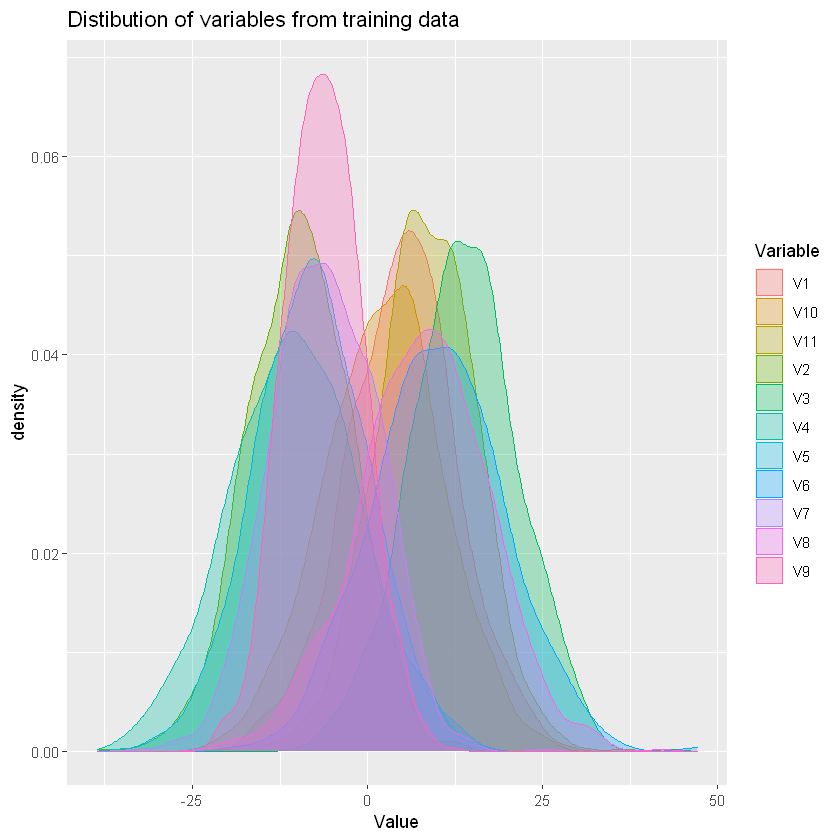

In [9]:
# Separate density plots for each variable (or features) in the training data
df_gather_train %>% ggplot(aes(x = Value, fill = Variable, color = Variable))+
geom_density(alpha = 0.3)+ggtitle('Distibution of variables from training data')

# Which variable appears the least normally disributed?

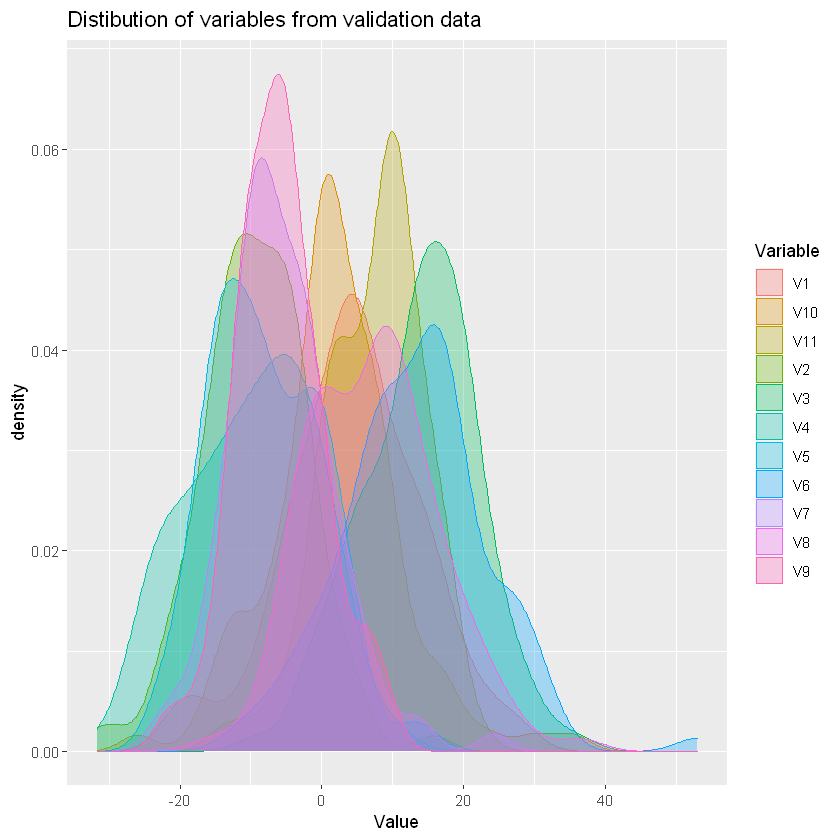

In [10]:
# Separate density plots for each variable (or features) in the validation data
df_gather_validate %>% ggplot(aes(x = Value, fill = Variable, color = Variable))+
geom_density(alpha = 0.3)+ggtitle('Distibution of variables from validation data')

# Which variable appears the least normally disributed?

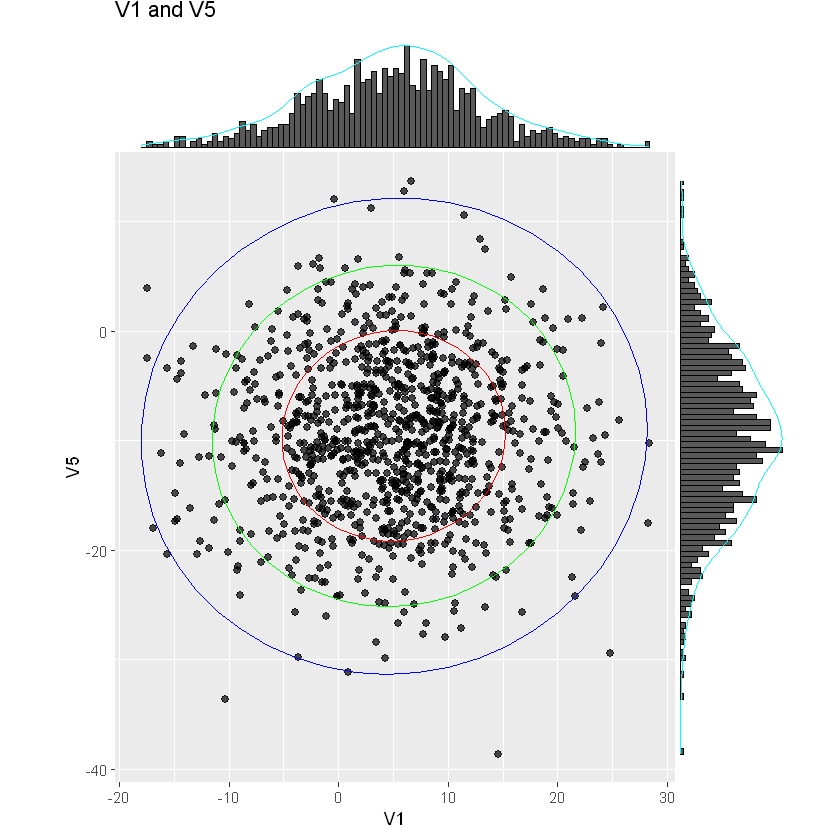

In [11]:
# Make a scatter plot with the marginal densities for any pair of variables
# in the training data
delta = 0.5 # bin width
p1 =  ggplot(data = df_train, aes(x = V1, y= V2)) +
geom_point(size = 2, alpha = 0.7) + xlab("V1") + 
   ylab("V5") + ggtitle("V1 and V5") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')
#p1
  
ggMarginal(p1, type = 'histogram', color = 'black', binwidth = delta) # V1 vs V2 scatter plot
ggMarginal(p1, type = 'density', color = 'cyan') # Adding Density



In [12]:
## Build model using training data 
mu_train = mean(X_train) # mean training sample
S_train = cov(as.data.frame(X_train)) # sample covariance matrix using training data
S_train_inverse = solve(S_train)  # inverse of sample covariance matrix from training data

# Mahalanobis distance of training samples
M_distance_train = apply(X_train, 1, function(x){sqrt(t(x-mu_train) %*% S_train_inverse %*% (x-mu_train))})

# Mahalanobis distance of validation samples using model built using training data
M_distance_validate = apply(X_validate, 1, function(x){sqrt(t(x-mu_train) %*% S_train_inverse %*% (x-mu_train))})

# Add Mahalanobis distance as new column of training and validation data frame
df_train$MD = M_distance_train 
df_validate$MD = M_distance_validate
head(df_train, n = 5)
head(df_validate, n =5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.653114,13.689702,17.552845,-11.933497,-5.756409,15.435921,-12.1367520,8.2241226,-4.8840241,5.3493353,17.351372352,5.075584
2,-5.630542,-18.937667,18.644624,-6.155825,-25.988864,15.409553,-16.5955163,9.4546537,-2.8771734,-6.0094204,19.210636116,6.638485
3,9.721525,-9.982489,15.571434,-32.224266,-5.595799,24.321383,0.8327735,10.7945546,0.7275748,10.3929750,7.085994903,5.820545
4,-4.635766,-10.716040,20.356571,-9.002097,-4.920569,-4.261957,-1.3058288,0.9499803,-8.6341066,0.1984454,0.006771413,4.058998
5,-12.841044,-20.388313,9.491936,-7.038500,-9.921087,-3.716105,-9.3847304,-2.3255336,-13.5185624,11.0070290,14.003210283,5.491532


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.271283,-12.359268,5.000970,1.611472,1.088592,29.31441,-8.313531,36.438338,-9.4766787,-25.9281827,7.108628,7.212771
2,-3.193070,-19.705821,6.528556,-21.570858,3.050556,23.47750,-1.133420,12.688409,-10.9683011,-1.1986661,1.908441,5.617825
3,-5.256678,-12.918720,25.435141,-7.231568,3.647838,12.36655,-6.512076,8.750902,-0.7687545,-3.2610945,13.729474,5.103901
4,12.953176,-10.350333,19.857858,-24.424608,3.266105,30.44529,-11.125842,12.815629,9.3513545,-6.1136236,17.627375,6.634932
5,3.763819,-5.728187,11.400169,-17.555297,-6.246576,16.15597,-9.724758,16.996616,-5.1686543,0.1879945,11.401234,4.609664


In [13]:
## Determine cutoff probability such that we get the best performance on the validation set
## Best performance corresponds to, for example, the best F1 score (close to 1)

# Add a new column to training and validation data frame for outliers
k = ncol(X_train) # dimensions
j = 5 # vary this to change cutoff probability, j = 5 we see balance
cutoff_probability = 1-(10^(-j))
threshold = qchisq(cutoff_probability, k) # threshold for Mahalanobis distance
df_train$Outliers = ((df_train$MD)^2 >= threshold)
df_validate$Outliers = ((df_validate$MD)^2 >= threshold)
print(threshold)

# True positives
tp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 1))
# False positives
fp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 0))
# False negatives
fn = sum((df_validate$Outliers == 'FALSE') & (y_validate == 1))
# Precision
precision = tp / (tp + fp) # (tp + fp) all detected as outliers
# Recall
recall = tp / (tp + fn) #(tp + fn) actual outliers
# F1 score
F1 = (2 * precision * recall) / (precision + recall)
# F score dhould always be closer to 1, i.e, when precision = recall

cat(sprintf('Threshold = %f\n', threshold))
cat(sprintf('For probability cutoff = %f, \nPrecision = %f,\nRecall = %f,\nF1 score = %f,\nFraction of outliers in training data = %f\n', cutoff_probability, precision, recall, F1,mean(df_train$Outliers == 'TRUE')))

[1] 43.20596
Threshold = 43.205960
For probability cutoff = 0.999990, 
Precision = 0.700000,
Recall = 0.700000,
F1 score = 0.700000,
Fraction of outliers in training data = 0.047000


In [14]:
j = 1
k = 11 # dimensions or the num of features
cutoff_probability = 1-(10^(-j))
print(cutoff_probability)
threshold = qchisq(cutoff_probability, k)
print(threshold)

[1] 0.9
[1] 17.27501


0.9

17.27501

90% are less than 17.27501 which aren not outliers

=> 90% aren't outliers and 10% are outliers for j =1